In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dmax = -15
time = np.arange(start=0, stop=1.0005, step=0.05)
ampl = np.array([0, 0.1, 0, 0.2, 0, 0.3, 0, 0.4, 0, 0.5, 0, 0.6, 0, 0.7, 0, 0.8, 0, 0.9, 0, 1, 0])

ampt = np.array([0, 0.1, -0.1, 0.2, -0.2, 0.3, -0.3, 0.4, -0.4, 0.5, -0.5, 0.6, -0.6, 0.7, -0.7, 0.8, -0.8, 0.9, -0.9, 1, -1])


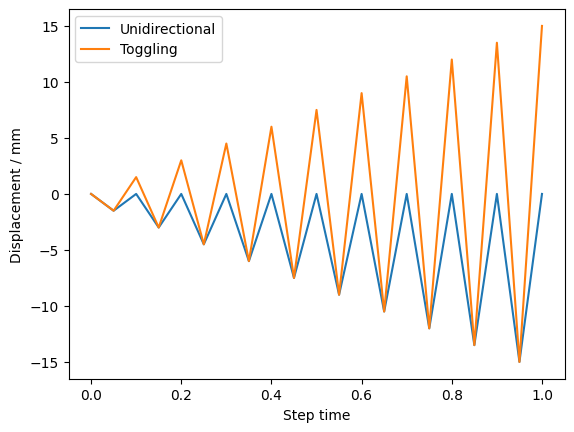

In [5]:
plt.plot(time, ampl*dmax, label='Unidirectional')
plt.plot(time, ampt*dmax, label='Toggling')
plt.xlabel('Step time')
plt.ylabel('Displacement / mm')
plt.legend()